In [1]:
# library
from keras.datasets import mnist

In [3]:
# train-test split
(train_images, train_labels) = mnist.load_data()[0]
(test_images, test_labels) = mnist.load_data()[1]

print("Shape of Train Images", train_images.shape)
print("Shape of Test Images", test_images.shape)

Shape of Train Images (60000, 28, 28)
Shape of Test Images (10000, 28, 28)


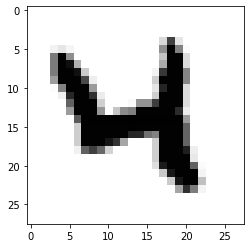

In [12]:
# displaying data
import matplotlib.pyplot as plt

plt.imshow(train_images[20], cmap="gray_r")
plt.show()

In [15]:
# preparing data

"""
1. 3D --> 4D Numpy Array
2. Normalization: /255

"""

# 3D --> 4D Numpy Array
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
print("Shape of Train Images", train_images.shape)
print("Shape of Test Images", test_images.shape)


# Normalization: /255
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255
test_images /= 255

Shape of Train Images (60000, 28, 28, 1)
Shape of Test Images (10000, 28, 28, 1)


In [16]:
input_shape = (28,28,1)

In [17]:
#library
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

# creating network
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [18]:
# compiling model
model.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [19]:
# fitting model
history = model.fit(x = train_images,
                    y = train_labels,
                    epochs = 10)



Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2152 - accuracy: 0.9356
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0870 - accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0610 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0460 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0374 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0307 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0256 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0237 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0203 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - l

In [20]:
# evaluating model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0672 - accuracy: 0.9851
Test Loss:  0.06720476597547531
Test Accuracy:  0.9850999712944031


In [21]:
history_dict = history.history
print("Keys: ", history_dict.keys())

Keys:  dict_keys(['loss', 'accuracy'])


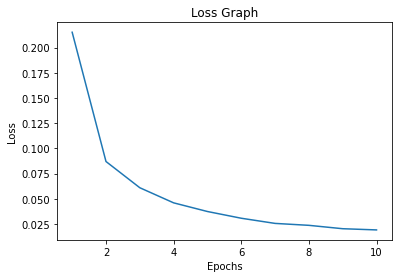

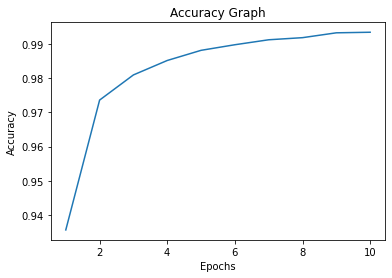

In [26]:
# loss, accuracy graph
import matplotlib.pyplot as plt

epochs = range(1,11)
loss = history_dict["loss"]
accuracy = history_dict["accuracy"]


plt.plot(epochs, loss)
plt.title("Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.plot(epochs, accuracy)
plt.title("Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [27]:
# saving model
model.save("mnist_model.h5")

Predicted Number:  6


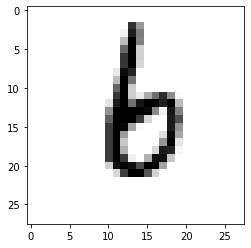

In [31]:
# loading model and prediction
from keras.models import load_model
import random

model = load_model("mnist_model.h5")


i = random.randint(1,5000)

prediction = model.predict(test_images[i].reshape(1,28,28,1))

print("Predicted Number: ",prediction.argmax())

plt.imshow(test_images[i].reshape(28,28), cmap="gray_r")
plt.show()